In [1]:
import torch

<h3>Gradient Descent</h3>

Calculating partial derivative for a given function.

In [2]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
print(x.grad)

tensor(2.)


In [3]:
print(z.grad)

tensor(12.)


<h3>Linear Regression</h3>

Creating a dataset.

In [4]:
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\Parnashri\Anaconda_3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
X = torch.randn(100,1)*10

Text(0, 0.5, 'Y')

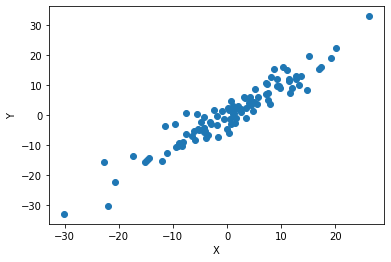

In [6]:
Y = X + torch.randn(100,1)*3 #adding noise
plt.plot(X.numpy(),Y.numpy(),marker='o',linestyle=' ')
plt.xlabel('X')
plt.ylabel('Y')

In [7]:
class LR(nn.Module):#module acts as base class for all neural network modules. LR class is sub-class
    
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        pred = self.linear(x)
        return pred

In [8]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [9]:
[w,b]=model.parameters()

def get_params():
    return (w[0][0].item(), b[0].item())
def plot_fit(title):
    plt.title=title
    w1,b1=get_params()
    x1=np.array([-30,30])
    y1=x1*w1+b1
    plt.plot(x1,y1,'r')
    plt.scatter(X,Y)
    plt.show()

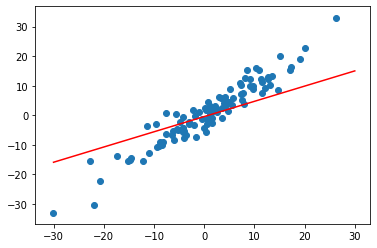

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [12]:
epochs=100
losses=[]
for i in range(epochs):
    y_pred=model.forward(X)
    loss=criterion(y_pred,Y) #y-actual output
    print('epoch:',i, "loss:", loss.item())
    
    losses.append(loss) #to visualize the loss foe every epoch
    optimizer.zero_grad() #set gradient=0 as it will get accumulated after each step
    loss.backward() #to minimize loss
    optimizer.step() #used to update model parameters, called once the gradients are computed

epoch: 0 loss: 35.60785675048828
epoch: 1 loss: 32.887088775634766
epoch: 2 loss: 30.459095001220703
epoch: 3 loss: 28.292306900024414
epoch: 4 loss: 26.35852813720703
epoch: 5 loss: 24.632665634155273
epoch: 6 loss: 23.092317581176758
epoch: 7 loss: 21.71746063232422
epoch: 8 loss: 20.490270614624023
epoch: 9 loss: 19.39482307434082
epoch: 10 loss: 18.41693687438965
epoch: 11 loss: 17.54393768310547
epoch: 12 loss: 16.7645320892334
epoch: 13 loss: 16.068634033203125
epoch: 14 loss: 15.447256088256836
epoch: 15 loss: 14.89238166809082
epoch: 16 loss: 14.396844863891602
epoch: 17 loss: 13.954267501831055
epoch: 18 loss: 13.558952331542969
epoch: 19 loss: 13.205816268920898
epoch: 20 loss: 12.890321731567383
epoch: 21 loss: 12.60842514038086
epoch: 22 loss: 12.356518745422363
epoch: 23 loss: 12.131379127502441
epoch: 24 loss: 11.930137634277344
epoch: 25 loss: 11.750226974487305
epoch: 26 loss: 11.589360237121582
epoch: 27 loss: 11.445494651794434
epoch: 28 loss: 11.316810607910156
epoch

Text(0.5, 0, 'epochs')

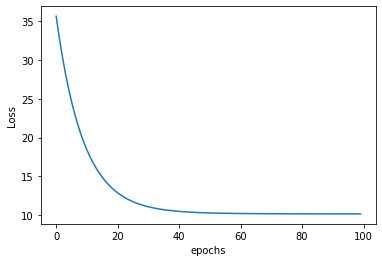

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

Model is not officially trained using gradient descent algorithm. It is seen that loss is exponentially decreasing. To visualize how our model fits the dataset, let us plot new linear model.

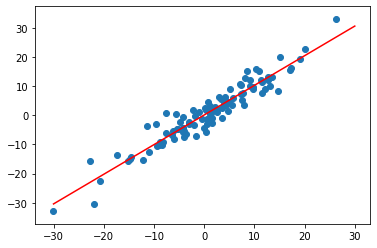

In [15]:
plot_fit('Trained Model')

We see that the model has fit the data pretty well.